## Work
1. 請將 Epoch 加到 500 個，並觀察 learning curve 的走勢
2. 請將 Optimizer 換成 SGD，並觀察 learning curve 的走勢

In [8]:
import os
import keras

# 本作業可以不需使用 GPU, 將 GPU 設定為 "無" (若有 GPU 且想開啟，可設為 "0")
os.environ["CUDA_VISIBLE_DEVICES"] = ""

In [9]:
# 從 Keras 的內建功能中，取得 train 與 test 資料集
train, test = keras.datasets.cifar10.load_data()

In [10]:
# 將 X 與 Y 獨立放進變數
x_train, y_train = train
x_test, y_test = test
# 資料前處理 - 標準化
x_train = x_train / 255.
x_test = x_test / 255.

# 將資料從圖形 (RGB) 轉為向量 (Single Vector)
x_train = x_train.reshape((len(x_train), -1))
x_test = x_test.reshape((len(x_test), -1))

# 將目標轉為 one-hot encoding
y_train = keras.utils.to_categorical(y_train, num_classes=10)
y_test = keras.utils.to_categorical(y_test, num_classes=10)

In [11]:
def build_mlp():
    """
    建立你的神經網路
    """
    input_layer = keras.layers.Input([x_train.shape[-1]])
    x = keras.layers.Dense(units=512, activation="relu")(input_layer)
    x = keras.layers.Dense(units=256, activation="relu")(x)
    x = keras.layers.Dense(units=128, activation="relu")(x)
    out = keras.layers.Dense(units=10, activation="softmax")(x)
    model = model = keras.models.Model(inputs=[input_layer], outputs=[out])
    
    return model
model = build_mlp()

In [12]:
#Compile 模型
optimizer = keras.optimizers.SGD(lr=0.001)
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

In [13]:
"""
設定要訓練的 Epoch 數
"""
model.fit(x_train, y_train, 
          epochs=500, 
          batch_size=256, 
          validation_data=(x_test, y_test), 
          shuffle=True)

Train on 50000 samples, validate on 10000 samples
Epoch 1/500
50000/50000 [==============================] - 5s 91us/step - loss: 2.2843 - accuracy: 0.1409 - val_loss: 2.2454 - val_accuracy: 0.1821
Epoch 2/500
50000/50000 [==============================] - 6s 120us/step - loss: 2.2216 - accuracy: 0.1932 - val_loss: 2.1952 - val_accuracy: 0.2099
Epoch 3/500
50000/50000 [==============================] - 7s 134us/step - loss: 2.1753 - accuracy: 0.2232 - val_loss: 2.1525 - val_accuracy: 0.2394
Epoch 4/500
50000/50000 [==============================] - 7s 136us/step - loss: 2.1341 - accuracy: 0.2460 - val_loss: 2.1146 - val_accuracy: 0.2668
Epoch 5/500
50000/50000 [==============================] - 7s 148us/step - loss: 2.0971 - accuracy: 0.2650 - val_loss: 2.0786 - val_accuracy: 0.2711
Epoch 6/500
50000/50000 [==============================] - 7s 142us/step - loss: 2.0627 - accuracy: 0.2801 - val_loss: 2.0454 - val_accuracy: 0.2852
Epoch 7/500
50000/50000 [==============================] 

50000/50000 [==============================] - 7s 138us/step - loss: 1.6827 - accuracy: 0.4154 - val_loss: 1.6893 - val_accuracy: 0.4134
Epoch 56/500
50000/50000 [==============================] - 7s 136us/step - loss: 1.6797 - accuracy: 0.4157 - val_loss: 1.6870 - val_accuracy: 0.4140
Epoch 57/500
50000/50000 [==============================] - 7s 137us/step - loss: 1.6765 - accuracy: 0.4174 - val_loss: 1.6824 - val_accuracy: 0.4150
Epoch 58/500
50000/50000 [==============================] - 7s 140us/step - loss: 1.6732 - accuracy: 0.4186 - val_loss: 1.6815 - val_accuracy: 0.4131
Epoch 59/500
50000/50000 [==============================] - 7s 139us/step - loss: 1.6702 - accuracy: 0.4194 - val_loss: 1.6764 - val_accuracy: 0.4150
Epoch 60/500
50000/50000 [==============================] - 7s 137us/step - loss: 1.6672 - accuracy: 0.4200 - val_loss: 1.6742 - val_accuracy: 0.4146
Epoch 61/500
50000/50000 [==============================] - 7s 137us/step - loss: 1.6641 - accuracy: 0.4211 - val

50000/50000 [==============================] - 7s 137us/step - loss: 1.5454 - accuracy: 0.4628 - val_loss: 1.5753 - val_accuracy: 0.4484
Epoch 110/500
50000/50000 [==============================] - 7s 137us/step - loss: 1.5436 - accuracy: 0.4627 - val_loss: 1.5669 - val_accuracy: 0.4536
Epoch 111/500
50000/50000 [==============================] - 7s 139us/step - loss: 1.5415 - accuracy: 0.4639 - val_loss: 1.5638 - val_accuracy: 0.4545
Epoch 112/500
50000/50000 [==============================] - 7s 137us/step - loss: 1.5395 - accuracy: 0.4647 - val_loss: 1.5616 - val_accuracy: 0.4549
Epoch 113/500
50000/50000 [==============================] - 7s 137us/step - loss: 1.5374 - accuracy: 0.4656 - val_loss: 1.5638 - val_accuracy: 0.4498
Epoch 114/500
50000/50000 [==============================] - 7s 137us/step - loss: 1.5360 - accuracy: 0.4671 - val_loss: 1.5613 - val_accuracy: 0.4518
Epoch 115/500
50000/50000 [==============================] - 7s 136us/step - loss: 1.5336 - accuracy: 0.4659

50000/50000 [==============================] - 4s 80us/step - loss: 1.4539 - accuracy: 0.4939 - val_loss: 1.4990 - val_accuracy: 0.4747
Epoch 164/500
50000/50000 [==============================] - 4s 81us/step - loss: 1.4525 - accuracy: 0.4926 - val_loss: 1.5037 - val_accuracy: 0.4740
Epoch 165/500
50000/50000 [==============================] - 4s 80us/step - loss: 1.4507 - accuracy: 0.4958 - val_loss: 1.4975 - val_accuracy: 0.4743
Epoch 166/500
50000/50000 [==============================] - 4s 80us/step - loss: 1.4493 - accuracy: 0.4948 - val_loss: 1.4956 - val_accuracy: 0.4746
Epoch 167/500
50000/50000 [==============================] - 4s 80us/step - loss: 1.4483 - accuracy: 0.4963 - val_loss: 1.4911 - val_accuracy: 0.4752
Epoch 168/500
50000/50000 [==============================] - 4s 80us/step - loss: 1.4461 - accuracy: 0.4969 - val_loss: 1.4911 - val_accuracy: 0.4780
Epoch 169/500
50000/50000 [==============================] - 4s 81us/step - loss: 1.4443 - accuracy: 0.4978 - val_

Epoch 218/500
50000/50000 [==============================] - 4s 80us/step - loss: 1.3740 - accuracy: 0.5204 - val_loss: 1.4456 - val_accuracy: 0.4884
Epoch 219/500
50000/50000 [==============================] - 4s 80us/step - loss: 1.3728 - accuracy: 0.5215 - val_loss: 1.4469 - val_accuracy: 0.4895
Epoch 220/500
50000/50000 [==============================] - 4s 81us/step - loss: 1.3713 - accuracy: 0.5216 - val_loss: 1.4464 - val_accuracy: 0.4894
Epoch 221/500
50000/50000 [==============================] - 4s 80us/step - loss: 1.3699 - accuracy: 0.5237 - val_loss: 1.4563 - val_accuracy: 0.4858
Epoch 222/500
50000/50000 [==============================] - 4s 80us/step - loss: 1.3687 - accuracy: 0.5220 - val_loss: 1.4424 - val_accuracy: 0.4914
Epoch 223/500
50000/50000 [==============================] - 4s 80us/step - loss: 1.3677 - accuracy: 0.5226 - val_loss: 1.4388 - val_accuracy: 0.4921
Epoch 224/500
50000/50000 [==============================] - 4s 80us/step - loss: 1.3658 - accuracy:

50000/50000 [==============================] - 4s 80us/step - loss: 1.3032 - accuracy: 0.5446 - val_loss: 1.4060 - val_accuracy: 0.5015
Epoch 273/500
50000/50000 [==============================] - 4s 80us/step - loss: 1.3026 - accuracy: 0.5441 - val_loss: 1.4031 - val_accuracy: 0.5006
Epoch 274/500
50000/50000 [==============================] - 4s 80us/step - loss: 1.3000 - accuracy: 0.5465 - val_loss: 1.4014 - val_accuracy: 0.5022
Epoch 275/500
50000/50000 [==============================] - 4s 80us/step - loss: 1.2991 - accuracy: 0.5454 - val_loss: 1.4030 - val_accuracy: 0.5005
Epoch 276/500
50000/50000 [==============================] - 4s 80us/step - loss: 1.2979 - accuracy: 0.5470 - val_loss: 1.4056 - val_accuracy: 0.5039
Epoch 277/500
50000/50000 [==============================] - 4s 80us/step - loss: 1.2963 - accuracy: 0.5473 - val_loss: 1.3968 - val_accuracy: 0.5058
Epoch 278/500
50000/50000 [==============================] - 4s 80us/step - loss: 1.2957 - accuracy: 0.5474 - val_

Epoch 327/500
50000/50000 [==============================] - 4s 80us/step - loss: 1.2377 - accuracy: 0.5672 - val_loss: 1.3908 - val_accuracy: 0.5058
Epoch 328/500
50000/50000 [==============================] - 4s 80us/step - loss: 1.2363 - accuracy: 0.5675 - val_loss: 1.3757 - val_accuracy: 0.5100
Epoch 329/500
50000/50000 [==============================] - 4s 80us/step - loss: 1.2363 - accuracy: 0.5676 - val_loss: 1.3955 - val_accuracy: 0.5007
Epoch 330/500
50000/50000 [==============================] - 4s 80us/step - loss: 1.2335 - accuracy: 0.5682 - val_loss: 1.4006 - val_accuracy: 0.5044
Epoch 331/500
50000/50000 [==============================] - 4s 80us/step - loss: 1.2338 - accuracy: 0.5667 - val_loss: 1.3701 - val_accuracy: 0.5120
Epoch 332/500
50000/50000 [==============================] - 4s 80us/step - loss: 1.2311 - accuracy: 0.5679 - val_loss: 1.3745 - val_accuracy: 0.5113
Epoch 333/500
50000/50000 [==============================] - 4s 80us/step - loss: 1.2304 - accuracy:

50000/50000 [==============================] - 4s 80us/step - loss: 1.1762 - accuracy: 0.5889 - val_loss: 1.3614 - val_accuracy: 0.5112
Epoch 382/500
50000/50000 [==============================] - 4s 80us/step - loss: 1.1752 - accuracy: 0.5892 - val_loss: 1.3802 - val_accuracy: 0.5087
Epoch 383/500
50000/50000 [==============================] - 4s 80us/step - loss: 1.1736 - accuracy: 0.5895 - val_loss: 1.3865 - val_accuracy: 0.5093
Epoch 384/500
50000/50000 [==============================] - 4s 80us/step - loss: 1.1725 - accuracy: 0.5902 - val_loss: 1.3694 - val_accuracy: 0.5093
Epoch 385/500
50000/50000 [==============================] - 4s 80us/step - loss: 1.1720 - accuracy: 0.5891 - val_loss: 1.3542 - val_accuracy: 0.5176
Epoch 386/500
50000/50000 [==============================] - 4s 80us/step - loss: 1.1703 - accuracy: 0.5922 - val_loss: 1.3597 - val_accuracy: 0.5216
Epoch 387/500
50000/50000 [==============================] - 4s 80us/step - loss: 1.1699 - accuracy: 0.5895 - val_

Epoch 436/500
50000/50000 [==============================] - 4s 80us/step - loss: 1.1188 - accuracy: 0.6083 - val_loss: 1.3447 - val_accuracy: 0.5221
Epoch 437/500
50000/50000 [==============================] - 4s 81us/step - loss: 1.1172 - accuracy: 0.6079 - val_loss: 1.3457 - val_accuracy: 0.5217
Epoch 438/500
50000/50000 [==============================] - 4s 81us/step - loss: 1.1153 - accuracy: 0.6086 - val_loss: 1.4149 - val_accuracy: 0.5041
Epoch 439/500
50000/50000 [==============================] - 4s 81us/step - loss: 1.1136 - accuracy: 0.6083 - val_loss: 1.3853 - val_accuracy: 0.5103
Epoch 440/500
50000/50000 [==============================] - 4s 81us/step - loss: 1.1152 - accuracy: 0.6092 - val_loss: 1.3708 - val_accuracy: 0.5146
Epoch 441/500
50000/50000 [==============================] - 4s 81us/step - loss: 1.1124 - accuracy: 0.6097 - val_loss: 1.3609 - val_accuracy: 0.5162
Epoch 442/500
50000/50000 [==============================] - 4s 81us/step - loss: 1.1137 - accuracy:

50000/50000 [==============================] - 4s 80us/step - loss: 1.0631 - accuracy: 0.6270 - val_loss: 1.3528 - val_accuracy: 0.5215
Epoch 491/500
50000/50000 [==============================] - 4s 83us/step - loss: 1.0616 - accuracy: 0.6283 - val_loss: 1.3895 - val_accuracy: 0.5137
Epoch 492/500
50000/50000 [==============================] - 4s 81us/step - loss: 1.0610 - accuracy: 0.6289 - val_loss: 1.3609 - val_accuracy: 0.5221
Epoch 493/500
50000/50000 [==============================] - 4s 81us/step - loss: 1.0609 - accuracy: 0.6282 - val_loss: 1.3534 - val_accuracy: 0.5255
Epoch 494/500
50000/50000 [==============================] - 4s 81us/step - loss: 1.0598 - accuracy: 0.6276 - val_loss: 1.3483 - val_accuracy: 0.5270
Epoch 495/500
50000/50000 [==============================] - 4s 81us/step - loss: 1.0581 - accuracy: 0.6283 - val_loss: 1.3918 - val_accuracy: 0.5132
Epoch 496/500
50000/50000 [==============================] - 4s 80us/step - loss: 1.0572 - accuracy: 0.6284 - val_

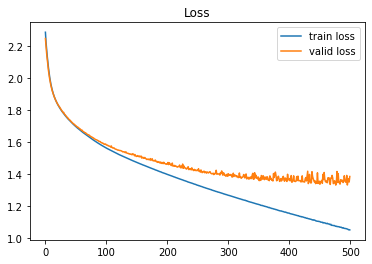

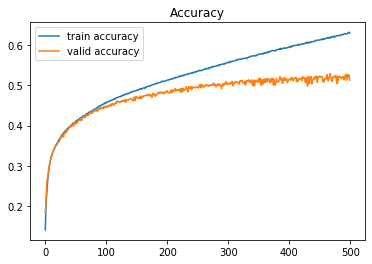

In [14]:
import matplotlib.pyplot as plt
# 以視覺畫方式檢視訓練過程

train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]

train_acc = model.history.history["accuracy"]
valid_acc = model.history.history["val_accuracy"]

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()